<a href="https://colab.research.google.com/github/IA-DAMA/DAMA-IA-DL/blob/main/Drowsiness_Detection_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Copyright*

* *https://github.com/IA-DAMA*
* *You might find deeper broader approaches in here: https://github.com/IA-DAMA/DAMA-IA-DL*

# <font color="red">*Introduction*</font>

*In today's fast-paced world, ensuring safety on the road is paramount, with driver fatigue and drowsiness being significant factors contributing to accidents. In this project, we aim to address this challenge by building a real-time drowsiness detection system using advanced deep learning techniques and open-source tools.*

*Our project centers around YOLOv5, a state-of-the-art object detection framework, to classify two critical states: `'awake' and 'drowsy'`. We start by collecting labeled images for these classes using a webcam, laying the foundation for model training.*

*Our code captures live video frames, processes them in real-time, and employs the trained `YOLOv5 model` to detect objects within the frames. These objects are displayed with bounding boxes, making it clear whether a person in the frame is awake or drowsy.*

*To create a custom dataset for training, we use the `'labelImg'` tool, enabling us to annotate images and generate `XML files`. With this dataset in hand, we train the YOLOv5 model with carefully chosen parameters.*

*The culmination is the deployment of the trained model for real-time object detection on live video input from the webcam. The applications extend beyond driver safety to areas where monitoring alertness is crucial.*

# <font color="red">*Developed and modified by Damadori*</font>

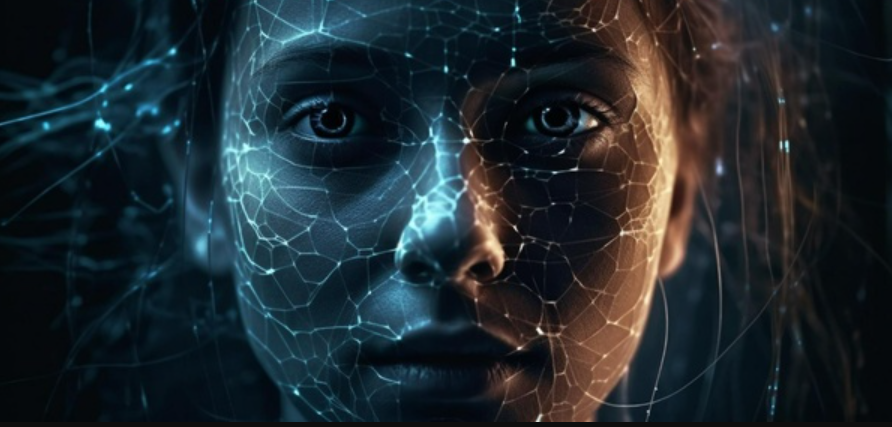

*Installing PyTorch and its dependencies as a requirement for running Object Detection code by using CUDA 11.1 for GPU acceleration*

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


<font color="blue">*Clone YOLOv5 repository:*</font> *That's a popular framework for Object Detection we'll be using further*

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [ ]:
!git --version

git version 2.42.0.windows.2


<font color="blue">*Installing YOLOv5 Dependencies:*</font> - *Changing the current working directory to the 'yolov5' directory and installing the required dependencies specified in 'requirements.txt'. These dependencies are essential for running YOLOv5-based object detection experiments.*

In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [ ]:
!pip install torch # Most important library for loading our model up

*Importing all necessary libraries for an initial approach on Object Detection*

In [ ]:
import cv2
import numpy as np
import torch
from matplotlib import pyplot as plt

# *Initialize YOLOv5 Model and Explain AutoShape Usage*

*We initialize the* <font color="purple">*YOLOv5 model*</font> *using the torch.hub.load function from the `'ultralytics/yolov5'` repository. The chosen model is `'yolov5s'`. Additionally, we take advantage of the `'AutoShape'` feature provided by YOLOv5, which automatically handles input image resizing and preprocessing. This simplifies the code and ensures consistent input sizes for inference.*

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\RAPHAEL/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-6 Python-3.11.4 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce MX110, 2048MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


# *Define YOLOv5 Model Architecture*

*The model is a multi-layered neural network consisting of convolutional layers, C3 blocks, SPPF (Spatial Pyramid Pooling Fusion), and detection layers. The architecture is summarized with details on the number of layers, parameters, and computational performance. This information is essential for understanding the structure of the* <font color="purple">*YOLOv5 model*</font> *used for object detection tasks.*

In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

#  *Load and Process an Image using YOLOv5 Model*

*In this cell, we load and process an image using the YOLOv5 model. The specified image URL is 'https://cdn.newsday.com/ace/c:NDBjOGJlYzItY2Q1MC00:YjAwNjcw/landscape/1280'. The result of the detection will be displayed in the subsequent cells.*

#  *Load and Process an Image*

In [ ]:
img = 'https://cdn.newsday.com/ace/c:NDBjOGJlYzItY2Q1MC00:YjAwNjcw/landscape/1280'

*Displaying YOLOv5 Model Detection Results*

In [ ]:
results = model(img)
results.print()

image 1/1: 720x1280 1 person, 1 bicycle, 15 cars, 2 buss, 2 trucks, 7 traffic lights
Speed: 142.2ms pre-process, 162.5ms inference, 14.9ms NMS per image at shape (1, 3, 384, 640)


*The `%matplotlib inline` magic command allows us to display the image directly in this Jupyter Notebook cell. The rendered output provides a clear view of the detected objects and their bounding boxes.*

<function matplotlib.pyplot.show(close=None, block=None)>

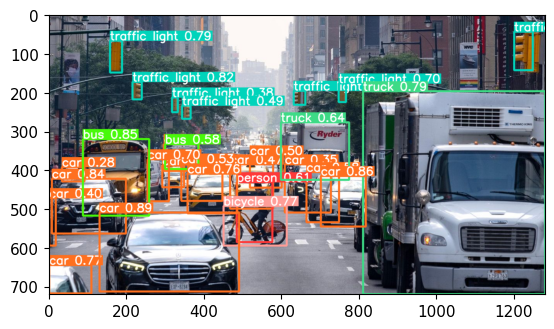

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show

*Loading Detailed YOLOv5 Detection Results: `results.show()` function provides a comprehensive display of detection information, including class labels, confidence scores, bounding boxes, and other relevant details about the detected objects. This detailed output is essential for analyzing the results of the object detection process.*

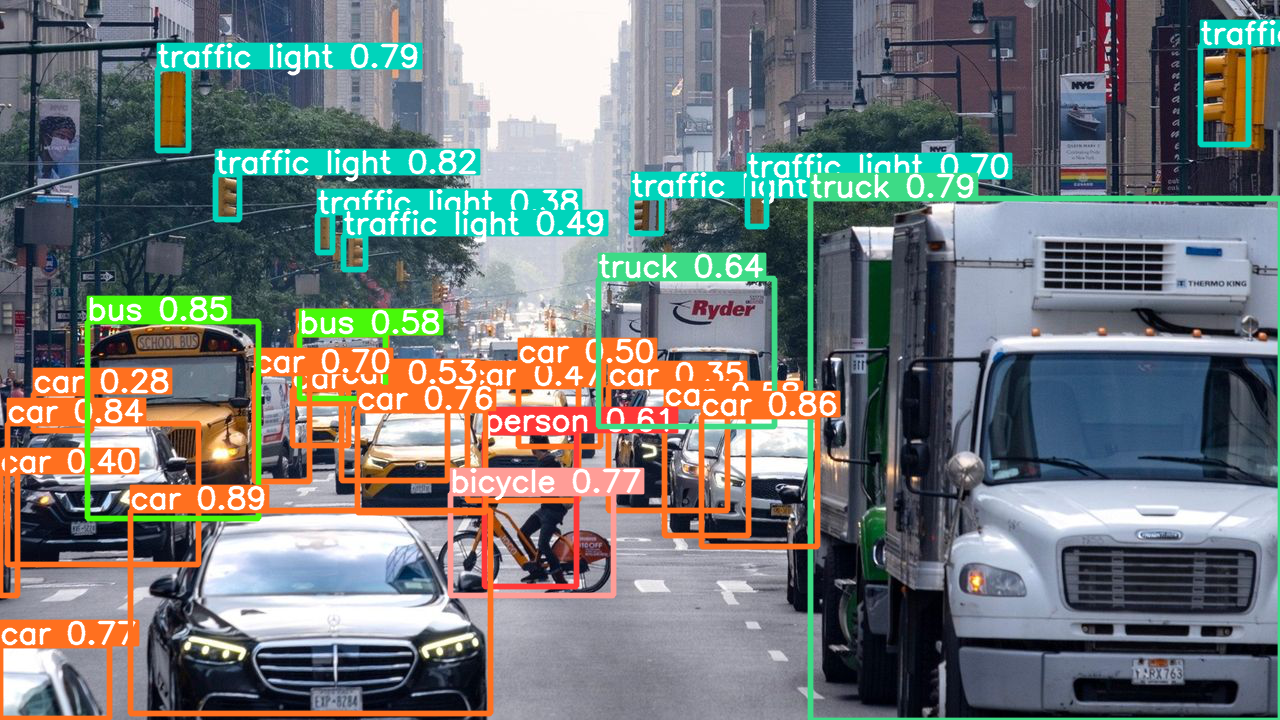

In [ ]:
results.show()

*`results.render()` function generates a visual output that provides a clear view of the detected objects and their corresponding bounding boxes.*

In [ ]:
results.render()

[array([[[103, 106, 121],
         [103, 106, 121],
         [103, 106, 121],
         ...,
         [ 86,  90, 101],
         [ 66,  70,  79],
         [ 52,  56,  65]],
 
        [[101, 104, 119],
         [102, 105, 120],
         [104, 107, 122],
         ...,
         [ 74,  78,  89],
         [ 48,  52,  61],
         [ 34,  38,  47]],
 
        [[103, 106, 121],
         [104, 107, 122],
         [107, 109, 124],
         ...,
         [ 82,  86,  97],
         [ 57,  61,  72],
         [ 52,  56,  67]],
 
        ...,
 
        [[255, 112,  31],
         [255, 112,  31],
         [255, 112,  31],
         ...,
         [ 49, 166, 105],
         [ 61, 219, 134],
         [ 61, 219, 134]],
 
        [[255, 112,  31],
         [255, 112,  31],
         [255, 112,  31],
         ...,
         [ 61, 219, 134],
         [ 61, 219, 134],
         [ 61, 219, 134]],
 
        [[255, 112,  31],
         [255, 112,  31],
         [255, 112,  31],
         ...,
         [ 61, 219, 134],
  

# *Load and Process a Video*



*Install the "pytube" library, which is a Python library for interacting with YouTube videos*

In [ ]:
!pip install pytube

In [ ]:
from pytube import YouTube

*In this cell, we load and process a video using the YOLOv5 model. The specified image URL is 'https://youtu.be/hQj_1h5cHCw'. The result of the detection will be displayed in the subsequent cells.*

In [ ]:
youtube_url = 'https://youtu.be/hQj_1h5cHCw'

In [ ]:
yt = YouTube(youtube_url)
video_stream = yt.streams.filter(file_extension='mp4', res='720p').first()
video_stream.download(output_path='.', filename='video.mp4')

'C:\\Users\\RAPHAEL\\.\\video.mp4'

In [ ]:
video_path = 'video.mp4'

In [ ]:
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# *Load and Process a Video (local)*

*In this cell, we load and process a video using the YOLOv5 model. Male sure you save it in the right `Dir`. The result of the detection will be displayed in the subsequent cells.*

In [ ]:
cap = cv2.VideoCapture(r'C:\Users\RAPHAEL\Downloads\Concretejungle.mp4')
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# *Real-Time Object Detection with YOLOv5 on Webcam Feed*

*The code captures frames from the default camera (camera index 0), makes detections using the YOLOv5 model, and displays the results with bounding boxes in the 'YOLO' window. Press 'q' to exit the application when finished.*

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# *Webcam Image Collection for Object Classification*


*In this session, we collect images from a webcam feed for two labels, `"awake"` and `"drowsy"`, which can be used for object classification tasks. The code captures a specified number of images for each label and saves them in separate directories under the specified `IMAGES_PATH`. The webcam feed is displayed in real-time, and each captured image is saved with a unique filename using `UUID`. To exit the image collection process, press the `'q'` key.*


*Importing dependencies*

In [ ]:
import uuid
import os
import time

*Preparing for image collection by setting up the image path, defining labels ("awake" and "drowsy"), and specifying the number of images to collect for each label (20 images per label)*

In [ ]:
IMAGES_PATH = os.path.join(r'C:\Users\RAPHAEL\YOLO\yolov5\data\images')
labels = ['awake', 'drowsy']
number_imgs = 20

*Looping through the specified labels `("awake" and "drowsy")` and providing a printout for each label, indicating that we are collecting images for that specific label.*

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(labels))

*This loop structure helps organize and document the image collection process for different labels and image numbers.*

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(labels))

    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

*In this code block, we continue the image collection loop for each label ("awake" and "drowsy"). For each label and image number combination, we generate a unique image file name using the label and a UUID. This step ensures that each captured image is uniquely named based on the label and a UUID, helping to avoid naming conflicts.*

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(labels))

    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1()))
        print(imgname)

C:\Users\RAPHAEL\YOLO\yolov5\data\images\awake.377419a4-6492-11ee-803e-5ccd5b6a6462
C:\Users\RAPHAEL\YOLO\yolov5\data\images\awake.377419a5-6492-11ee-acd0-5ccd5b6a6462
C:\Users\RAPHAEL\YOLO\yolov5\data\images\awake.377419a6-6492-11ee-b26c-5ccd5b6a6462
C:\Users\RAPHAEL\YOLO\yolov5\data\images\awake.377419a7-6492-11ee-913e-5ccd5b6a6462
C:\Users\RAPHAEL\YOLO\yolov5\data\images\awake.377419a8-6492-11ee-9332-5ccd5b6a6462
C:\Users\RAPHAEL\YOLO\yolov5\data\images\awake.377419a9-6492-11ee-85e3-5ccd5b6a6462
C:\Users\RAPHAEL\YOLO\yolov5\data\images\awake.377419aa-6492-11ee-8d06-5ccd5b6a6462
C:\Users\RAPHAEL\YOLO\yolov5\data\images\awake.377419ab-6492-11ee-84bc-5ccd5b6a6462
C:\Users\RAPHAEL\YOLO\yolov5\data\images\awake.377419ac-6492-11ee-88b3-5ccd5b6a6462
C:\Users\RAPHAEL\YOLO\yolov5\data\images\awake.377419ad-6492-11ee-bb9d-5ccd5b6a6462
C:\Users\RAPHAEL\YOLO\yolov5\data\images\awake.377419ae-6492-11ee-aae2-5ccd5b6a6462
C:\Users\RAPHAEL\YOLO\yolov5\data\images\awake.377419af-6492-11ee-bdba-5ccd5

# *Webcam Image Collection Loop*

*Initialize webcam capture using OpenCV and then loop through each label ("awake" and "drowsy"). For each label and image number combination, we capture an image from the webcam. The captured image is saved with a unique file name based on the label and a UUID, ensuring uniqueness. The images are saved in separate directories for each label under the specified path.*

In [ ]:
# Initialize the webcam capture using OpenCV
cap = cv2.VideoCapture(0)

# Loop through each label
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # Capture a specified number of images for each label
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        # Read a frame from the webcam
        ret, frame = cap.read()

        # Construct the image file name using the label and a unique UUID
        imgname = os.path.join(IMAGES_PATH, label, '{}.jpg'.format(str(uuid.uuid4())))

        # Ensure that the directory for the label exists
        # .makedirs(os.path.dirname(imgname), exist_ok=True)

        # Save the captured image
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)

        # Wait for some time before capturing the next image
        time.sleep(2)

    # Check if the 'q' key is pressed to exit the loop
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the webcam and close any open windows
cap.release()
cv2.destroyAllWindows()

*Create file paths for images by combining a base path `(IMAGES_PATH)`, a label from a list of labels `(labels[0])`, a unique UUID converted to a string, and the `'.jpg'` file extension.*

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

C:\Users\RAPHAEL\YOLO\yolov5\data\images\awake.86ad1afd-64b7-11ee-81bf-5ccd5b6a6462.jpg


In [ ]:
import lxml
print(lxml.__version__)

4.9.3


# *Cloning the labelImg Repository*

*`labelImg` is a popular graphical image annotation tool that allows users to draw bounding boxes around objects in images to create labeled datasets for tasks like object detection.*

In [ ]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


*Installing PyQt5 and lxml Dependencies: PyQt5 and lxml packages as user-specific dependencies. These packages are required for running `labelImg`, the graphical image annotation tool. PyQt5 is used for the graphical user interface (GUI), and lxml is used for parsing XML files, which are commonly used in image annotation projects.*

In [ ]:
!pip install --user pyqt5 lxml

* *Upgrading PyQt5 and lxml Dependencies and Compiling Resources: Upgrade the PyQt5 and lxml packages to their latest versions. After that, the command navigates to the `labelImg` directory and compiles the resource file `(resources.qrc)` into Python code `(resources.py)` using pyrcc5. This step is essential for labelImg to correctly load its graphical resources.*

In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# *YOLOv5 Training*


*Train a YOLOv5 object detection model on a custom dataset. It specifies parameters such as input image size, batch size, number of epochs, dataset configuration, pretrained weights, and data loading workers.*

In [ ]:
!cd C:\Users\RAPHAEL\YOLO\yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-226-gdd9e338 Python-3.11.4 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce MX110, 2048MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hs

*Torch and OS Imports*

In [ ]:
import torch
import os

# *Loading a Custom YOLOv5 Model*

*It loads a custom YOLOv5 object detection model using the `'ultralytics/yolov5'` repository from PyTorch Hub. The `'path'` parameter specifies the path to the custom model weights (last.pt), and 'force_reload=True' ensures that the model is reloaded, even if it has been loaded before. This allows you to work with a specific model checkpoint for further inference or analysis.*

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path=R'C:\Users\RAPHAEL\YOLO\yolov5\runs\train\exp10\weights\last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\RAPHAEL/.cache\torch\hub\master.zip
YOLOv5  2023-10-7 Python-3.11.4 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce MX110, 2048MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


*Loading an Image*

In [ ]:
img = os.path.join(r'C:\Users\RAPHAEL\YOLO\data\images\df4bb596-eec6-43b4-a59b-213c370c684b.jpg')

* *YOLOv5 Inference: The `'model'` object loaded earlier is used to make predictions on the image, and the results are stored in the 'results' variable. These results may include detected objects and their associated information, which can be further processed or visualized as needed.*

In [ ]:
results = model(img)

* *YOLOv5 Inference Results*

In [ ]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 46.2ms pre-process, 320.9ms inference, 37.1ms NMS per image at shape (1, 3, 480, 640)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

* *YOLOv5 Inference Visualization: It visualizes the inference results from the YOLOv5 model for the given image. It uses Matplotlib to display the image with bounding boxes drawn around detected objects. The 'results.render()' function is used to obtain the image with bounding boxes, which is then displayed using Matplotlib.*

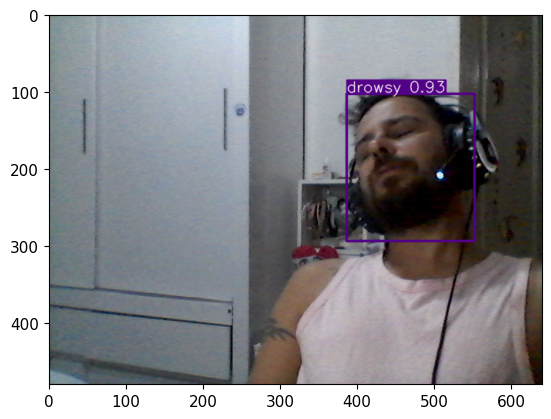

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# *Real-time YOLOv5 Object Detection*

*Real-time video from a webcam using OpenCV and object detection performance using the YOLOv5 model. Detected objects are displayed with bounding boxes in the video feed.*

In [ ]:
# Initialize the webcam capture using OpenCV
cap = cv2.VideoCapture(0)

# Start an infinite loop to capture video frames
while cap.isOpened():
    # Read a frame from the webcam
    ret, frame = cap.read()

    # Perform object detection on the frame
    results = model(frame)

    # Display the frame with bounding boxes drawn around detected objects
    cv2.imshow('YOLO', np.squeeze(results.render()))

    # Check if the 'q' key is pressed to exit the loop just as earlier on this project
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the webcam and close any open windows

cap.release()
cv2.destroyAllWindows()

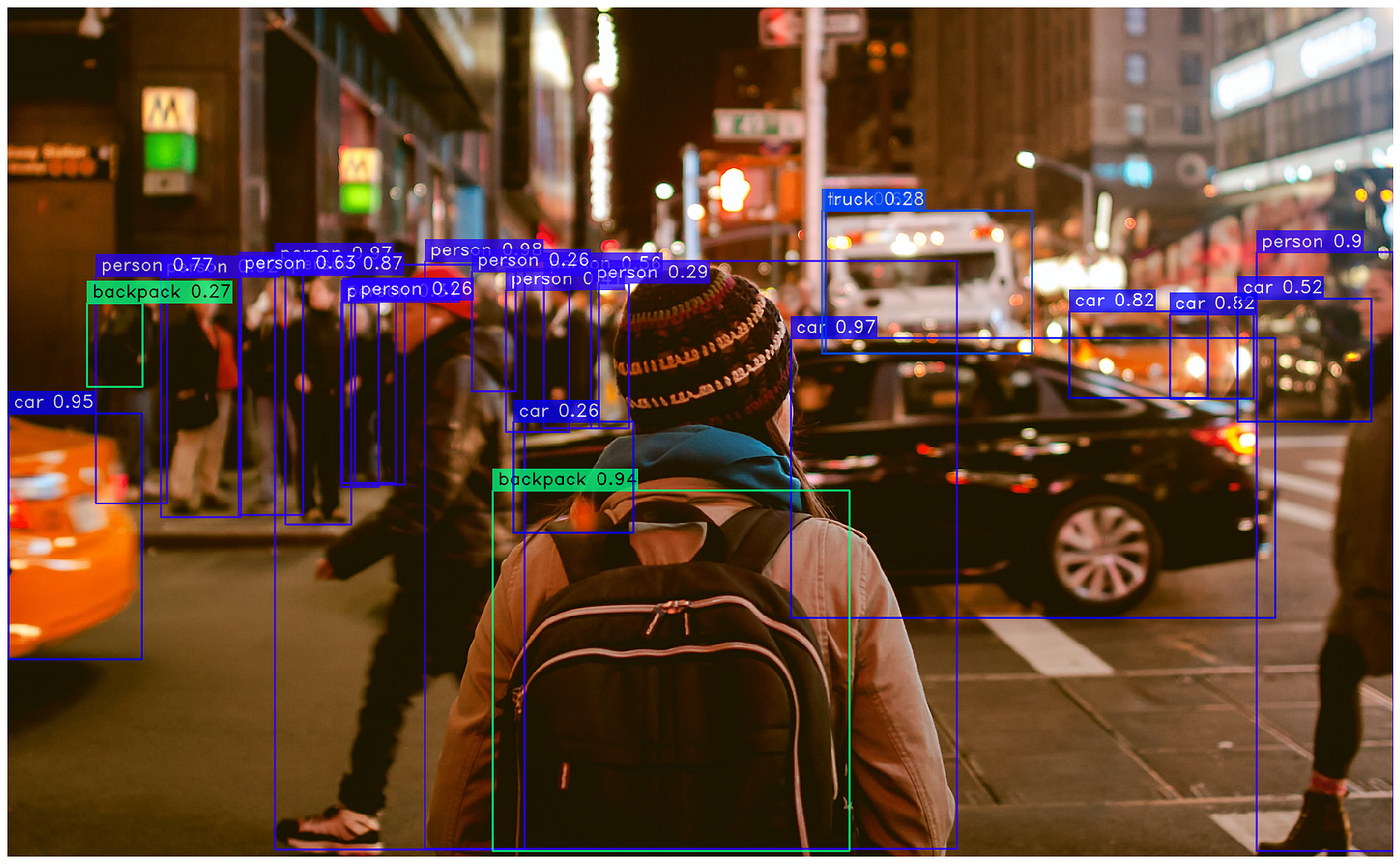

# <font color="red">*Summary*</font>

*This project involves setting up and training a custom object detection model using YOLOv5, a deep learning framework. The project includes collecting labeled images for the "awake" and "drowsy" classes using a webcam. The code captures video frames, performs real-time object detection using the trained YOLOv5 model, and displays the frames with bounding boxes around detected objects. Additionally, the project utilizes the labelImg tool for image annotation and XML file generation to create a custom dataset for training. Training the YOLOv5 model on this dataset is achieved with specified parameters, such as image size, batch size, and the number of epochs. Finally, the trained model is used to make real-time object detection predictions on video input from the webcam. This project serves as a foundation for building a drowsiness detection system, which can have applications in driver safety and other areas where monitoring alertness is critical*